# X-PSI twospot example

In [1]:
%matplotlib inline

from __future__ import print_function, division

import numpy as np
import math

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import rcParams, rc
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib import gridspec, ticker

import sys
import xpsi
                   
import os

from xpsi import PostProcessing
PostProcessing.publication_rc_settings()
PostProcessing.random_seed = 0

from xpsi.global_imports import _dpr, _keV, _k_B

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|              Version: 0.1                 |
\=============================================/

Imported GetDist version: 0.3.1
Imported nestcheck version: 0.2.0


In [2]:
from CustomData import CustomData                                                                                                               
from CustomInstrument import CustomInstrument                                                                                                   
from CustomPulse_trueback import CustomPulse                                                                                                             
from CustomSpacetime import CustomSpacetime                                                                                                     
from CustomPrior_trueback import CustomPrior                                                                                                             
from CustomBackground_wnorm import CustomBackground                                                                                                   
                                                                                                                                                
data = CustomData.from_SWG('../data/synthetic_realisation.dat', 984307.666100)                                                                     
                                                                                                                                                
NICER = CustomInstrument.from_SWG(num_params=0,                                                                                                 
                                  bounds=[],
                                  ARF = '../model_data/nicer_v1.01_arf.txt',                                                                       
                                  RMF = '../model_data/nicer_v1.01_rmf_matrix.txt',
                                  max_input=500,                                                                                   
                                  min_input=0,
                                  chan_edges = '../model_data/nicer_v1.01_rmf_energymap.txt')

background = CustomBackground(num_params = 2, bounds = [(-3.0,-1.01), (-5.0, -1.0)])  

pulse = CustomPulse(tag = 'all',                                                                                                                
                    num_params = 2,                                                                                                             
                    bounds = [(-0.25, 0.75), (-0.25, 0.75)],                                                                                    
                    data = data,                                                                                                                
                    instrument = NICER,                                                                                                         
                    background = background,                                                                                                          
                    interstellar = None,                                                                                                        
                    energies_per_interval = 0.5,                                                                                                
                    default_energy_spacing = 'logspace',                                                                                        
                    fast_rel_energies_per_interval = 0.5,
                    store=True)                                                                                                              
                                                                                                                                                
from xpsi.global_imports import _c, _G, _M_s, _dpr, gravradius                                                                                  
                                                                                                                                                
bounds = [(0.1, 1.0),                                                                                                                           
          (1.0, 3.0),                                                                                                                           
          (3.0 * gravradius(1.0), 16.0),                                                                                                        
          (0.001, math.pi/2.0)]                                                                                                                 
                                                                                                                                                
spacetime = CustomSpacetime(num_params = 4, bounds = bounds, S = 300.0)                                                                         
                                                                                                                                                
bounds = [(0.001, math.pi - 0.001),                                                                                                             
          (0.001, math.pi/2.0 - 0.001),                                                                                                         
          (5.5, 6.5),                                                                                                                           
          (0.001, math.pi - 0.001),                                                                                                             
          (0.001, math.pi/2.0 - 0.001),                                                                                                         
          (5.5, 6.5)]                                                                                                                           
                                                                                                                                                
spot = xpsi.Spots(num_params=(3,3), bounds=bounds,                                                                                              
                    symmetry=True,                                                                                                              
                    hole=False,                                                                                                                 
                    cede=False,                                                                                                                 
                    concentric=False,                                                                                                           
                    antipodal_symmetry=False,                                                                                                   
                    sqrt_num_cells=32,                                                                                                          
                    min_sqrt_num_cells=10,                                                                                                      
                    max_sqrt_num_cells=64,                                                                                                      
                    do_fast=False,                                                                                                              
                    num_leaves=100,                                                                                                             
                    num_rays=200)                                                                                                               
                                                                                                                                                
photosphere = xpsi.Photosphere(num_params = 0, bounds = [],                                                                                     
                               tag = 'all', spot = spot, elsewhere = None)                                                                      
                                                                                                                                                
star = xpsi.Star(spacetime = spacetime, photospheres = photosphere)                                                                             
                                                                                                                                                
likelihood = xpsi.Likelihood(star = star, pulses = pulse, threads=1)                                                                            
                                                                                                                                                
prior = CustomPrior(bounds=likelihood.bounds, spacetime=spacetime)                                                                              
                                                                                                                                                
likelihood.prior = prior

In [3]:
prior._bounds

[(0.1, 1.0),
 (1.0, 3.0),
 (4.429875115500001, 16.0),
 (0.001, 1.5707963267948966),
 (0.001, 3.1405926535897932),
 (0.001, 1.5697963267948967),
 (5.5, 6.5),
 (0.001, 3.1405926535897932),
 (0.001, 1.5697963267948967),
 (5.5, 6.5),
 (-3.0, -1.01),
 (-5.0, -1.0),
 (-0.25, 0.75),
 (-0.25, 0.75)]

In [4]:
print(CustomPrior.__doc__)

 A custom (joint) prior distribution.

    Currently tailored to the NICER light-curve SWG model specification.

    Source: Imaginary
    Model variant: ST-U

    Parameter vector:

    * p[0] = distance (kpc)
    * p[1] = (rotationally deformed) gravitational mass (solar masses)
    * p[2] = coordinate equatorial radius (km)
    * p[3] = inclination of Earth to rotational axis (radians)
    * p[4] = primary cap centre colatitude (radians)
    * p[5] = primary cap angular radius (radians)
    * p[6] = primary cap log10(comoving blackbody temperature [K])
    * p[7] = secondary cap centre colatitude (radians)
    * p[8] = secondary cap angular radius (radians)
    * p[9] = secondary cap log10(comoving blackbody temperature [K])
    * p[10] = powerlaw index
    * p[11] = powerlaw norm
    * p[12] = primary cap phase shift (cycles); (alias for initial azimuth, periodic)
    * p[13] = secondary cap phase shift (cycles)

    


## Consistency check with previous calculations

In [5]:
np.log10(32.0*1.89127972e-05)

-3.218094255992889

In [6]:
32.0*1.89127972e-05

0.0006052095104

In [7]:
inj = [0.2, 1.4, 12.5, 1.25,
         1.0, 0.075, 6.2,
         math.pi - 1.0, 0.2, 6.0,
         -2.0, np.log10(32.0*1.89127972e-05), 0.0, 0.025]

In [8]:
MML = [0.171956580805009251E+00,
       0.142307888369304991E+01,
       0.156282018870417048E+02,
       0.140938194699686203E+01,
       0.710570797388111353E+00,
       0.584412633897629166E-01,
       0.618108651797997055E+01,
       0.240377960821061798E+01,
       0.150247987940317684E+00,
       0.598256618252837757E+01,
       -0.200212169736932477E+01,
       -0.321733562424522646E+01,
       0.403749953725918154E-02,
       0.271696527531780641E-01]

In [12]:
%%prun
likelihood.threads=1

likelihood._theta = [0]*len(likelihood._theta)
ll = likelihood(inj)

In [10]:
ll # MML; 24388277.48097419

24388277.48097419

/home/thomas/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


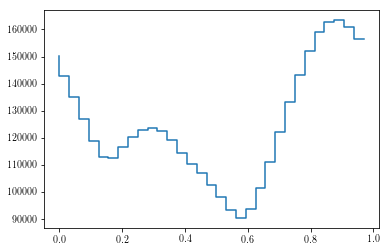

In [14]:
plt.step(pulse.data.phases[:-1], np.sum(pulse.expected_counts,axis=0))

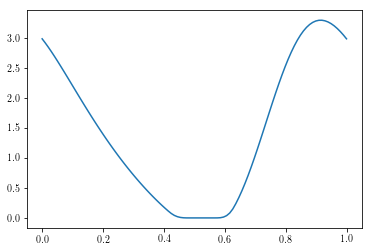

In [20]:
plt.plot(pulse.phases, np.sum(pulse.pulse[0],axis=0))

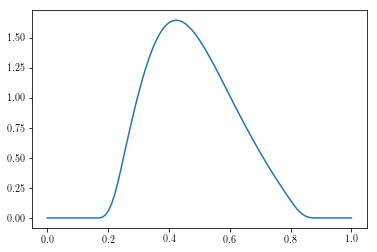

In [21]:
plt.plot(pulse.phases, np.sum(pulse.pulse[1],axis=0))

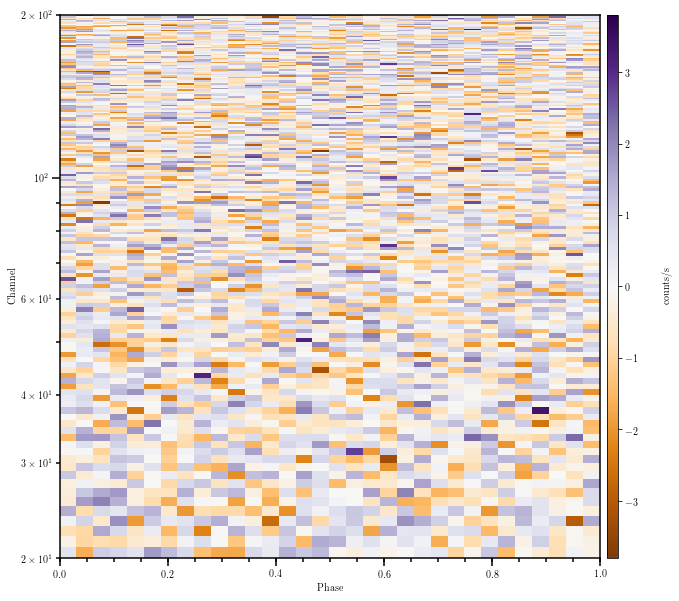

In [22]:
from matplotlib.ticker import MultipleLocator
from matplotlib import gridspec
from matplotlib import cm

fig = plt.figure(figsize = (10,10))

gs = gridspec.GridSpec(1, 2, width_ratios=[50,1])
ax = plt.subplot(gs[0])
ax_cb = plt.subplot(gs[1])

z = (pulse.expected_counts - data.counts)/np.sqrt(pulse.expected_counts)

profile = ax.pcolormesh(data.phases,
                         NICER.channels,
                         z,
                         cmap = plt.cm.PuOr,
                         vmin = -np.max(np.abs(z)),
                         vmax = np.max(np.abs(z)),
                         linewidth = 0,
                         rasterized = True)

profile.set_edgecolor('face')

ax.tick_params(which='major', colors='black', length=8)
ax.tick_params(which='minor', colors='black', length=4)
ax.xaxis.set_tick_params(which='both', width=1.5)
ax.yaxis.set_tick_params(which='both', width=1.5)
plt.setp(ax.spines.values(), linewidth=1.5, color='black')

ax.set_xlim([0.0, 1.0])
ax.set_yscale('log')
ax.set_ylabel(r'Channel')
[i.set_color("black") for i in ax.get_xticklabels()]
[i.set_color("black") for i in ax.get_yticklabels()]
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))

ax.set_xlabel(r'Phase')

cb = plt.colorbar(profile,
                  cax = ax_cb)

cb.set_label(label=r'counts/s', labelpad=25)
cb.solids.set_edgecolor('face')

plt.subplots_adjust(wspace = 0.025)

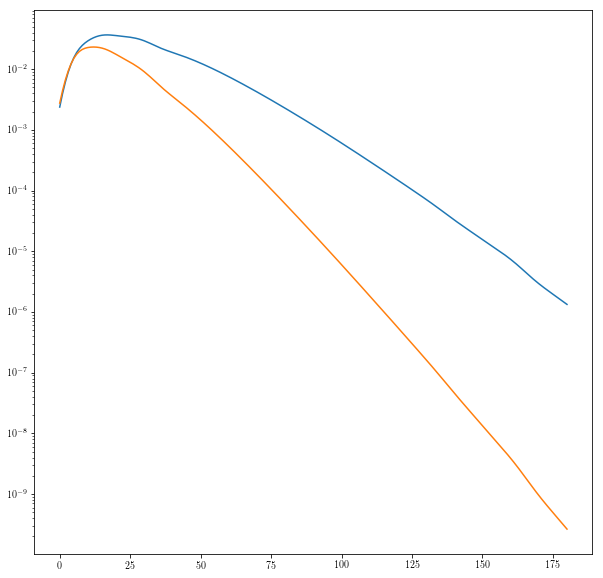

In [23]:
fig = plt.figure(figsize=(10,10))

for spectrum in pulse.pulse:
    plt.plot(np.sum(spectrum/100.0, axis=1), ls='-')
    
plt.gca().set_yscale('log')

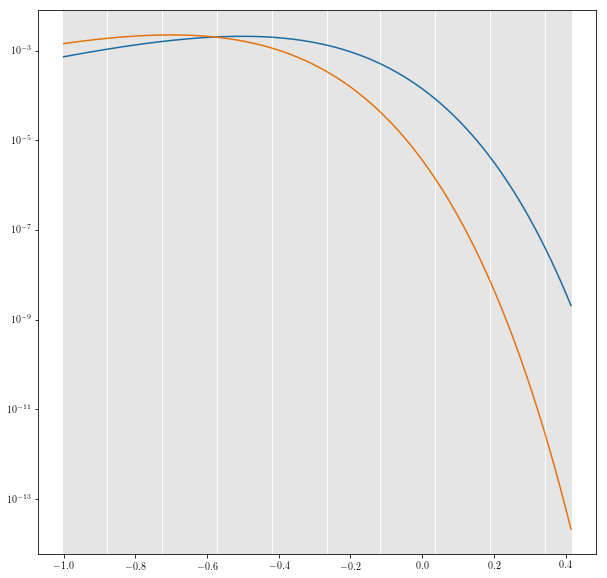

In [24]:
fig = plt.figure(figsize=(10,10))

for spectrum in pulse.raw_signals:
    plt.plot(np.log10(pulse.logspace_energies_hires), pulse.logspace_energies_hires*np.sum(spectrum, axis=1)/100.0, ls='-')

for E in pulse.default_energies:
    plt.axvline(np.log10(E), lw=0.2, color='k')

plt.gca().set_yscale('log')

In [25]:
signal = xpsi.tools.phase_integrator.phase_integrator(1.0,                                                                                                          
                                                      np.array([0.0,1.0]),                                                                                         
                                                      pulse.pulse[0],                                                                                                       
                                                      pulse.phases,                                                                                             
                                                      0.0)

signal += xpsi.tools.phase_integrator.phase_integrator(1.0,                                                                                                          
                                                       np.array([0.0,1.0]),                                                                                         
                                                       pulse.pulse[1],                                                                                                       
                                                       pulse.phases,                                                                                             
                                                       0.0)

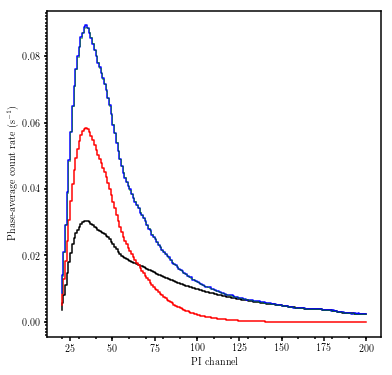

In [26]:
figure = plt.figure(figsize=(6,6))

plt.step(pulse.instrument.channels, np.sum(pulse._background.folded_background, axis=1)/32.0, 'k-')
plt.step(pulse.instrument.channels, signal.reshape(-1), 'r-')
plt.step(pulse.instrument.channels, np.sum(pulse.data.counts,axis=1)/pulse.data.exposure_time, 'b-')
plt.step(pulse.instrument.channels, np.sum(pulse._background.folded_background, axis=1)/32.0 + signal.reshape(-1), 'g-', lw=0.5)

ax = plt.gca()

ax.set_ylabel('Phase-average count rate (s$^{-1}$)')
ax.set_xlabel('PI channel')
ax.xaxis.set_minor_locator(MultipleLocator(10.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.001))

ax.xaxis.set_tick_params(which='both', width=1.5)                                                                                
ax.yaxis.set_tick_params(which='both', width=1.5)
for spine in ax.spines.itervalues():                                                                                            
    spine.set_linewidth(1.5)

#figure.savefig('MML_source_MMLMCL_background.pdf', dpi=300, bbox_inches='tight')

## posterior

Core hours:

In [40]:
print(CustomPrior.__doc__)

 A custom (joint) prior distribution.

    Currently tailored to the NICER light-curve SWG model specification.

    Source: Imaginary
    Model variant: ST-U

    Parameter vector:

    * p[0] = distance (kpc)
    * p[1] = (rotationally deformed) gravitational mass (solar masses)
    * p[2] = coordinate equatorial radius (km)
    * p[3] = inclination of Earth to rotational axis (radians)
    * p[4] = primary cap centre colatitude (radians)
    * p[5] = primary cap angular radius (radians)
    * p[6] = primary cap log10(comoving blackbody temperature [K])
    * p[7] = secondary cap centre colatitude (radians)
    * p[8] = secondary cap angular radius (radians)
    * p[9] = secondary cap log10(comoving blackbody temperature [K])
    * p[10] = primary cap phase shift (cycles); (alias for initial azimuth, periodic)
    * p[11] = secondary cap phase shift (cycles)

    


In [3]:
names = ['distance', 'mass', 'radius', 'inclination',
         'colatitude_p',
         'radius_p',
         'temperature_p',
         'colatitude_s',
         'radius_s',
         'temperature_s',
         'powerlaw_index',
         'powerlaw_norm',
         'phase_shift_p',
         'phase_shift_s',
         'compactness',
         'phase_separation']

# the hard bounds imposed above
bounds = {'distance': (0.1, 1.0),
          'mass': (1.0, 3.0),
          'radius': (3.0 * gravradius(1.0), 16.0),
          'inclination': (0.001, math.pi/2.0),
          'colatitude_p': (0.001, math.pi - 0.001),
          'radius_p': (0.001, math.pi/2.0 - 0.001),
          'temperature_p': (5.5, 6.5),
          'colatitude_s': (0.001, math.pi - 0.001),
          'radius_s': (0.0, math.pi/2.0 - 0.001),
          'temperature_s': (5.1, 6.8),
          'powerlaw_index': (-3.0, -1.01),
          'powerlaw_norm': (-5.0, -1.0),
          'phase_shift_p': (-0.5,0.5),
          'phase_shift_s': (-0.5,0.5),
          'compactness': (gravradius(1.0)/16.0, 1.0/3.0),
          'phase_separation': (0.0, 1.0)}

# LaTeX compatible labels
labels = {'distance': r"D\;\mathrm{[kpc]}",
          'mass': r"M\;\mathrm{[M}_{\odot}\mathrm{]}",
          'radius': r"R_{\mathrm{eq}}\;\mathrm{[km]}",
          'inclination': r"i\;\mathrm{[rad]}",
          'colatitude_p': r"\Theta_{p}\;\mathrm{[rad]}",
          'radius_p': r"\zeta_{p}\;\mathrm{[rad]}",
          'temperature_p': r"\mathrm{log10}(\mathcal{T}_{\mathrm{p}}\;[\mathrm{K}])",
          'colatitude_s': r"\Theta_{s}\;\mathrm{[rad]}",
          'radius_s': r"\zeta_{s}\;\mathrm{[rad]}",
          'temperature_s': r"\mathrm{log10}(\mathcal{T}_{\mathrm{s}}\;[\mathrm{K}])",
          'powerlaw_index': r"\beta",
          'powerlaw_norm': r"\mathrm{log_{10}}(\alpha\;\mathrm{[s^{-1}\,cm^{-2}\,keV^{-1}]})",
          'phase_shift_p': r"\phi_{p}\;\mathrm{[cycles]}",
          'phase_shift_s': r"\phi_{s}\;\mathrm{[cycles]}",
          'compactness': r"M/R_{\mathrm{eq}}",
          'phase_separation': r"\Delta\phi\;\mathrm{[cycles]}"}

getdist_kde_settings = {'ignore_rows': 0,
                         'min_weight_ratio': 1.0e-10,
                         'contours': [0.683, 0.954, 0.997],
                         'credible_interval_threshold': 0.001,
                         'range_ND_contour': 0,
                         'range_confidence': 0.001,
                         'fine_bins': 1024,
                         'smooth_scale_1D': 0.4,
                         'num_bins': 100,
                         'boundary_correction_order': 1,
                         'mult_bias_correction_order': 1,
                         'smooth_scale_2D': 0.4,
                         'max_corr_2D': 0.99,
                         'fine_bins_2D': 512,
                         'num_bins_2D': 40}

In [4]:
truths = [0.2, 1.4, 12.5, 1.25,
             1.0, 0.075, 6.2,
             math.pi - 1.0, 0.2, 6.0,
             -2.0, np.log10(32.0*1.89127972e-05),
             0.0, 0.025, gravradius(1.4)/12.5, 0.525]

In [5]:
truths = dict(zip(names, truths))

In [6]:
truths

{'colatitude_p': 1.0,
 'colatitude_s': 2.141592653589793,
 'compactness': 0.165382004312,
 'distance': 0.2,
 'inclination': 1.25,
 'mass': 1.4,
 'phase_separation': 0.525,
 'phase_shift_p': 0.0,
 'phase_shift_s': 0.025,
 'powerlaw_index': -2.0,
 'powerlaw_norm': -3.218094255992889,
 'radius': 12.5,
 'radius_p': 0.075,
 'radius_s': 0.2,
 'temperature_p': 6.2,
 'temperature_s': 6.0}

In [7]:
pp = PostProcessing.PostProcessor.load_runs(['./runs/run1/run1_nlive1000_eff0.3_noCONST_noMM_noIS_tol-1'],
                                            ['run 1'],
                                            use_nestcheck=[True],
                                            base_dir='./',
                                            kde_settings=getdist_kde_settings,
                                            names=names,
                                            bounds=bounds,
                                            labels=labels,
                                            truths=truths,
                                            implementation='multinest',
                                            transform=prior.transform,
                                            likelihood=likelihood)

/home/thomas/.local/lib/python2.7/site-packages/GetDist-0.3.1-py2.7.egg/getdist/chains.py:1149: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  weights = None if self.chains[0].weights is None else np.hstack((chain.weights for chain in self.chains))
/home/thomas/.local/lib/python2.7/site-packages/GetDist-0.3.1-py2.7.egg/getdist/chains.py:1150: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  loglikes = None if self.chains[0].loglikes is None else np.hstack((chain.loglikes for chain in self.chains))
/home/thomas/.local/lib/python2.7/site-packages/GetDist-0.3.1-py2.7.egg/getdist/chains.py:1151: FutureWarning: arrays to stack must be passed as a "sequence" typ

In [11]:
pp.KL_divergence(bootstrap=True, n_simulate=500, ID='run 1')

[array([92.79845681]), array([93.76932743]), array([94.65041536])]

In [12]:
KL = np.array([92.79845681, 93.76932743, 94.65041536])

In [13]:
KL[1] - KL[0]

0.9708706199999995

In [14]:
KL[2] - KL[1]

0.8810879299999925

In [17]:
cred_ints = [0.05, 0.5, 0.95]

In [18]:
import nestcheck

In [19]:
for c in cred_ints:
    _ = nestcheck.error_analysis.run_ci_bootstrap(pp.runs['run 1'].nestcheck_backend,
                                                  estimator_list=[nestcheck.estimators.logz],
                                                  cred_int=c,
                                                  n_simulate=500,
                                                  simulate_weights=True,
                                                  flip_skew=True)
    print(_)

[24388206.23145404]
[24388206.74827547]
[24388207.29826751]


In [20]:
Z = np.array([24388206.23145404, 24388206.74827547, 24388207.29826751]) - 24413582.28500478 # correct with data term

In [23]:
Z

array([-25376.05355074, -25375.53672931, -25374.98673727])

In [21]:
Z[1] - Z[0]

0.5168214291334152

In [22]:
Z[2] - Z[1]

0.5499920397996902

In [87]:
pp.runs['run 1'].names

['distance',
 'mass',
 'radius',
 'inclination',
 'colatitude_p',
 'radius_p',
 'temperature_p',
 'colatitude_s',
 'radius_s',
 'temperature_s',
 'phase_shift_p',
 'phase_shift_s',
 'compactness']

In [8]:
pp.plot_posteriorDensity(params=['distance',
                                 'radius',
                                 'mass',
                                 'inclination',
                                 'colatitude_p',
                                 'radius_p',
                                 'temperature_p',
                                 'colatitude_s',
                                 'radius_s',
                                 'temperature_s',
                                 'phase_shift_p',
                                 'phase_separation'],
                         run_IDs=['run 1',],
                         prior_density=True,
                         KL_divergence=True,
                         ndraws=1e5,
                         combine=False, combine_all=False, only_combined=False,
                         param_plot_lims={},
                         bootstrap_estimators=True,
                         bootstrap_density=False,
                         crosshairs=True,
                         write=True,
                         ext='.png',
                         maxdots=4000,
                         root_filename='twospots_true',
                         credible_interval_1d=True,
                         ID_for_1D_estimators='run 1',
                         annotate_credible_interval=True,
                         compute_all_intervals=False,
                         sixtyeight=True,
                         x_label_rotation=45.0,
                         num_plot_contours=3,
                         subplot_size=4.0,
                         tick_prune=None,
                         legend_loc='lower left',
                         legend_corner_coords=(0.65,0.7),
                         legend_frameon=False,
                         scale_attrs={'legend_fontsize': 5.0,
                                      'axes_fontsize': 'lab_fontsize',
                                      'lab_fontsize': 2.0},
                         colormap='Reds',
                         shaded=True,
                         shade_root_index=-1,
                         rasterized_shade=True,
                         no_ylabel=True,
                         no_ytick=True,
                         lw=1.0,
                         lw_1d=1.0,
                         filled=False,
                         normalize=True,
                         veneer=True,
                         tqdm_kwargs={'disable': False},
                         lengthen=2.0,
                         embolden=1.0,
                         nx=500,
                         scale_ymax=1.1,
                         n_simulate=200)

>> Executing posterior density estimation...
>> Curating set of runs for posterior plotting...
>> Run set curated.
>> Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['distance', 'radius']
plotting:  ['distance', 'mass']
plotting:  ['distance', 'inclination']
plotting:  ['distance', 'colatitude_p']
plotting:  ['distance', 'radius_p']
plotting:  ['distance', 'temperature_p']
plotting:  ['distance', 'colatitude_s']
plotting:  ['distance', 'radius_s']
plotting:  ['distance', 'temperature_s']
plotting:  ['distance', 'phase_shift_p']
plotting:  ['distance', 'phase_separation']
plotting:  ['radius', 'mass']
plotting:  ['radius', 'inclination']
plotting:  ['radius', 'colatitude_p']
plotting:  ['radius', 'radius_p']
plotting:  ['radius', 'temperature_p']
plotting:  ['radius', 'colatitude_s']
plotting:  ['radius', 'radius_s']
plotting:  ['radius', 'temperature_s']
plotting:  ['radius', 'phase_shift_p']
plotting:  ['radius', 'phase_separation']
plotting:  ['mass',

>> Plotting data and model for posterior checking...
>> Curating set of runs for posterior plotting...
>> Run set curated.
>> Instantiating a pulse plotter for posterior checking...
>> Pulse plotter instantiated.
>> Checking whether an existing cache can be read:
>> Cache state determined.
>> Adding credible intervals on source photon flux signal as function of phase...


>> Credible intervals added.
>> Adding credible intervals on source count rate signal as function of phase...


>> Credible intervals added.
>> Adding credible intervals on source photon specific flux spectrum...


>> Credible intervals added.
>> Adding count data to topmost panel split over two phase cycles...
>> Data added.
>> Adding posterior expectation of phase-channel count signalto second panel...
>> Adding residuals between data and posterior expected signal to third panel...
>> Residuals added.
>> Posterior expected signal added.
>> Adding posterior expectation of source signals...
>> Added posterior expected

/home/thomas/anaconda/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs [u'ls', u'linestyle'] which are all aliases for u'linestyle'.  Kept value from u'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


>> Written.
>> Plotted data and model for posterior checking.


/home/thomas/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


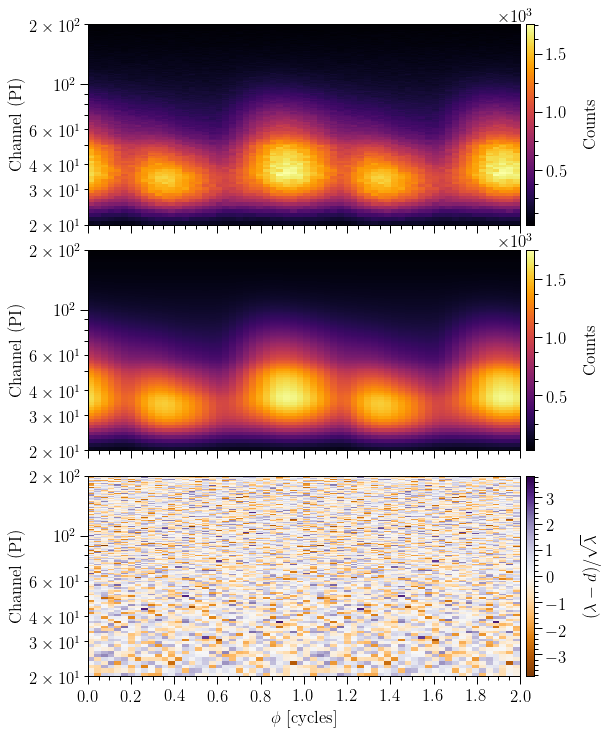

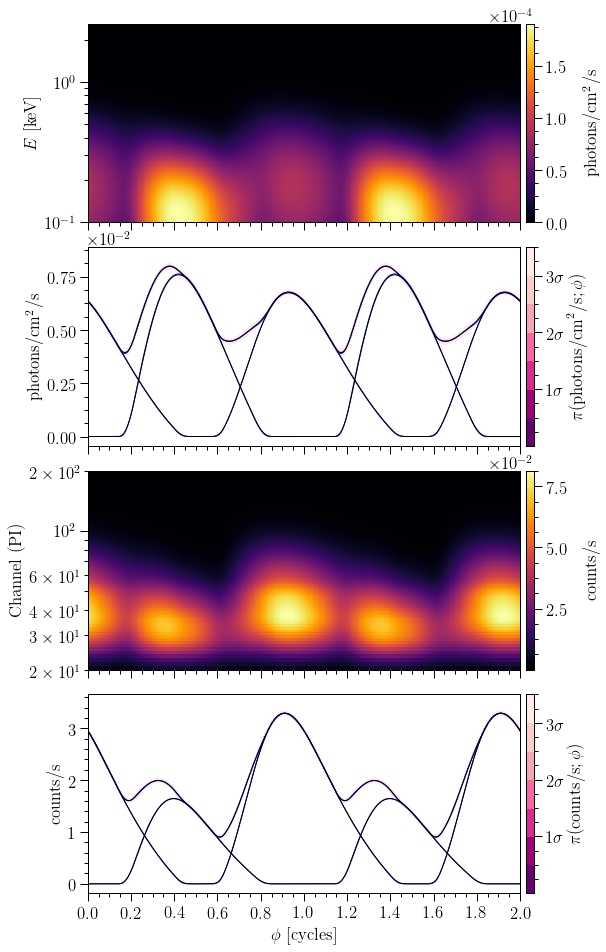

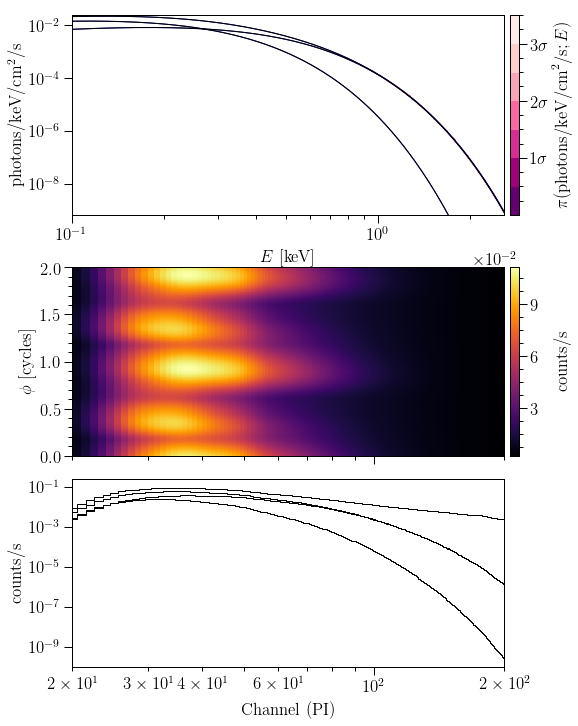

In [8]:
likelihood.threads = 4
pp.plot_pulse_and_spectrum(run_IDs=['run 1',],
                              combine=False,
                              combine_all=False,
                              show_components=True,
                              cache=True,
                              nsamples=500,
                              num_phases=500,
                              absorbed_spectrum=False,
                              archive=True,
                              ny=500,
                              write=True,
                              root_filename='twospots_true',
                              plot_truth=True,
                              use_fgivenx=True,
                              fscale=1.3,
                              truth_line_kwargs = dict(color='b',
                                                         ls='-',
                                                         lw=1.0,
                                                         alpha=1.0))

>> Executing posterior density estimation...
>> Curating set of runs for posterior plotting...
>> Run set curated.
>> Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['powerlaw_norm', 'powerlaw_index']
>> Adding 1D marginal prior density functions...
>> Estimating 1D marginal KL-divergences in bits...
powerlaw_norm KL-divergence = 10.3816/-0.0273/+0.0274
powerlaw_index KL-divergence = 6.7984/-0.0383/+0.0293
>> Estimated 1D marginal KL-divergences.
>> Added 1D marginal prior density functions.
>> Veneering spines and axis ticks...
>> Veneered.
>> Adding parameter truth crosshairs...
>> Added crosshairs.
>> Adding 1D marginal credible intervals...
powerlaw_norm CI_{68\%} = -3.2181/-0.0007/+0.0007
powerlaw_norm CI_{90\%} = -3.2181/-0.0012/+0.0012
powerlaw_norm CI_{95\%} = -3.2181/-0.0014/+0.0014
powerlaw_index CI_{68\%} = -2.0010/-0.0044/+0.0043
powerlaw_index CI_{90\%} = -2.0010/-0.0072/+0.0072
powerlaw_index CI_{95\%} = -2.0010/-0.0085/+0.0086
>> Added 1D

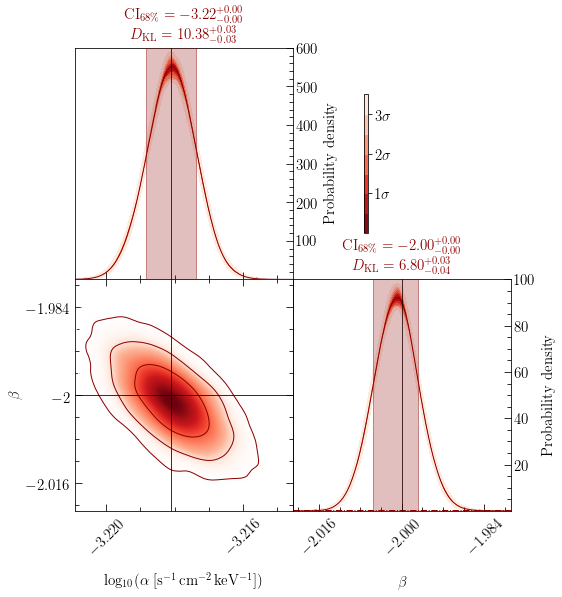

In [17]:
pp.plot_posteriorDensity(params=['powerlaw_norm','powerlaw_index'],
                         run_IDs=['run 1'],
                         prior_density=True,
                         KL_divergence=True,
                         ndraws=1e5,
                         combine=False, combine_all=False, only_combined=False,
                         param_plot_lims={},
                         bootstrap_estimators=True,
                         bootstrap_density=True,
                         crosshairs=True,
                         write=True,
                         ext='.png',
                         maxdots=4000,
                         root_filename='background',
                         credible_interval_1d=True,
                         ID_for_1D_estimators='run 1',
                         annotate_credible_interval=True,
                         compute_all_intervals=True,
                         sixtyeight=True,
                         x_label_rotation=45.0,
                         num_plot_contours=3,
                         subplot_size=4.0,
                         tick_prune=None,
                         legend_loc='lower left',
                         legend_corner_coords=(0.65,0.7),
                         legend_frameon=False,
                         scale_attrs={'legend_fontsize': 2.0,
                                      'axes_fontsize': 'lab_fontsize'},
                         colormap='Reds',
                         shaded=True,
                         shade_root_index=-1,
                         rasterized_shade=True,
                         lw=1.0,
                         lw_1d=1.0,
                         filled=False,
                         normalize=True,
                         veneer=True,
                         tqdm_kwargs={'disable': False},
                         lengthen=2.0,
                         embolden=1.0,
                         nx=500,
                         scale_ymax=1.1,
                         n_simulate=200)

In [25]:
wmax = np.max(pp.runs['run 1'].samples[:,0])

In [26]:
(pp.runs['run 1'].samples[pp.runs['run 1'].samples[:,0] >= 1.0e-6*wmax,0]).shape

(17452,)